# Iris 

In [149]:
#Импортим нужные библиотеки:
import numpy as np
import pandas as pd
import seaborn as sns

#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn import metrics
#Model Select
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.svm import LinearSVC
from sklearn.svm import SVC


from sklearn.model_selection import GridSearchCV


%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\mi\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['cm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [150]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [151]:
dt = pd.read_csv('datasets_19_420_Iris.csv',encoding='utf-8')
dt = pd.DataFrame(dt) 
dt=dt.drop(['Id'],axis=1)
dt.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [152]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [153]:
dt.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [154]:
dt.shape

(150, 5)

In [155]:
dt['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

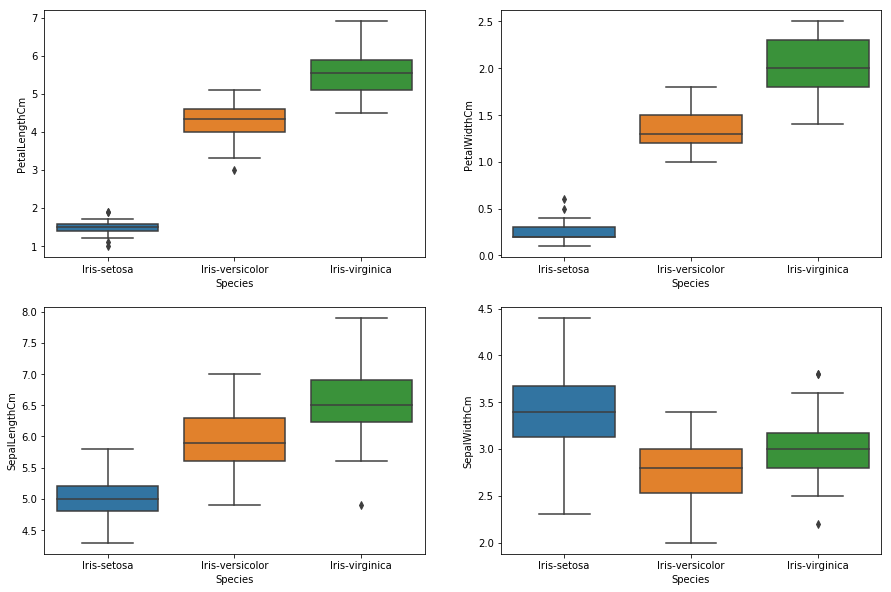

In [156]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(x='Species',y='PetalLengthCm',data=dt)
plt.subplot(2,2,2)
sns.boxplot(x='Species',y='PetalWidthCm',data=dt)
plt.subplot(2,2,3)
sns.boxplot(x='Species',y='SepalLengthCm',data=dt)
plt.subplot(2,2,4)
sns.boxplot(x='Species',y='SepalWidthCm',data=dt)
plt.show()

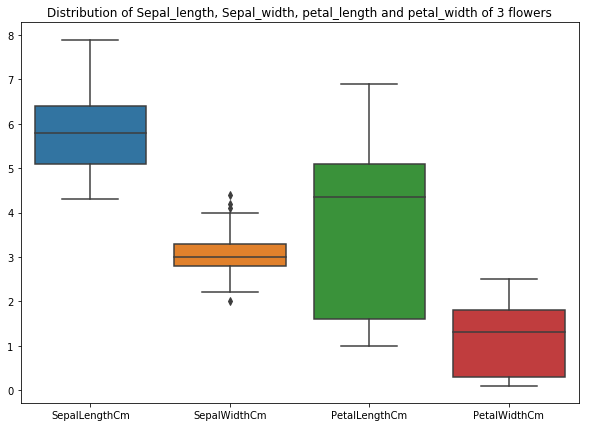

In [157]:
plt.subplots(figsize=(10,7))
sns.boxplot(data=dt).set_title("Distribution of Sepal_length, Sepal_width, petal_length and petal_width of 3 flowers")
plt.show()

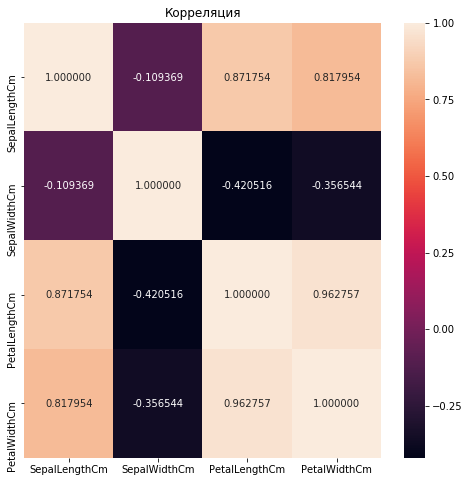

In [158]:
plt.subplots(figsize = (8,8))
sns.heatmap(dt.corr(),annot=True,fmt="f").set_title("Корреляция")
plt.show()

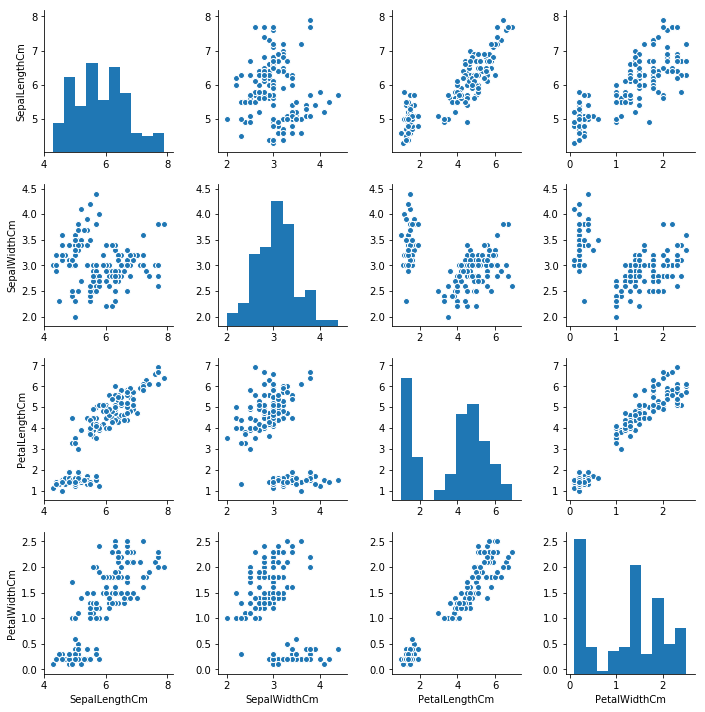

In [159]:
# Диаграммы рассеяния
g = sns.pairplot(dt)

Species  нельзя забабахать график распределения


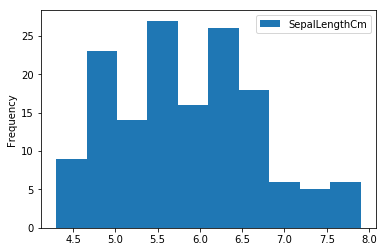

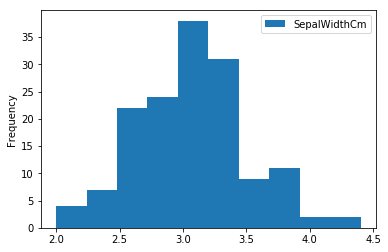

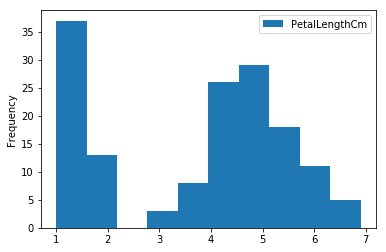

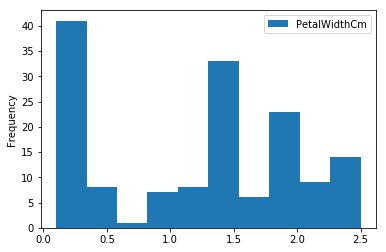

In [160]:
for column in dt:
    try:
        dt.plot(y=column, kind='hist')
    except TypeError:
        print(column, ' нельзя забабахать график распределения')


## Обучение моделей

In [161]:
X=dt.iloc[:,0:4].values
y=dt.iloc[:,4].values
#Train and Test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [162]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_prediction = random_forest.predict(X_test)
accuracy_rf=round(accuracy_score(y_test,Y_prediction)* 100, 2)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)


cm = confusion_matrix(y_test, Y_prediction)
accuracy = accuracy_score(y_test,Y_prediction)
precision =precision_score(y_test, Y_prediction,average='micro')
recall =  recall_score(y_test, Y_prediction,average='micro')
f1_rf = f1_score(y_test,Y_prediction,average='micro')
print('Confusion matrix for Random Forest\n',cm)
print('accuracy_random_Forest : %.3f' %accuracy)
print('precision_random_Forest : %.3f' %precision)
print('recall_random_Forest : %.3f' %recall)
print('f1-score_random_Forest : %.3f' %f1_rf)

Confusion matrix for Random Forest
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
accuracy_random_Forest : 0.978
precision_random_Forest : 0.978
recall_random_Forest : 0.978
f1-score_random_Forest : 0.978


In [163]:
logreg = LogisticRegression(solver= 'lbfgs',max_iter=400)
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
accuracy_lr=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)


cm = confusion_matrix(y_test, Y_pred,)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1_lr = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Logistic Regression\n',cm)
print('accuracy_Logistic Regression : %.3f' %accuracy)
print('precision_Logistic Regression : %.3f' %precision)
print('recall_Logistic Regression: %.3f' %recall)
print('f1-score_Logistic Regression : %.3f' %f1_lr)

Confusion matrix for Logistic Regression
 [[16  0  0]
 [ 0 16  2]
 [ 0  0 11]]
accuracy_Logistic Regression : 0.956
precision_Logistic Regression : 0.956
recall_Logistic Regression: 0.956
f1-score_Logistic Regression : 0.956


In [164]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test) 
accuracy_knn=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1_knn = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for KNN\n',cm)
print('accuracy_KNN : %.3f' %accuracy)
print('precision_KNN : %.3f' %precision)
print('recall_KNN: %.3f' %recall)
print('f1-score_KNN : %.3f' %f1_knn)

Confusion matrix for KNN
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
accuracy_KNN : 0.978
precision_KNN : 0.978
recall_KNN: 0.978
f1-score_KNN : 0.978


In [165]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test) 
accuracy_nb=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1_nb = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1_nb)

Confusion matrix for Naive Bayes
 [[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
accuracy_Naive Bayes: 1.000
precision_Naive Bayes: 1.000
recall_Naive Bayes: 1.000
f1-score_Naive Bayes : 1.000


In [166]:
linear_svc = LinearSVC(max_iter=4000)
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
accuracy_svc=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1_svc = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for SVC\n',cm)
print('accuracy_SVC: %.3f' %accuracy)
print('precision_SVC: %.3f' %precision)
print('recall_SVC: %.3f' %recall)
print('f1-score_SVC : %.3f' %f1_svc)

Confusion matrix for SVC
 [[16  0  0]
 [ 0 15  3]
 [ 0  0 11]]
accuracy_SVC: 0.933
precision_SVC: 0.933
recall_SVC: 0.933
f1-score_SVC : 0.933


In [167]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train)  
Y_pred = decision_tree.predict(X_test) 
accuracy_dt=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1_dt = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for DecisionTree\n',cm)
print('accuracy_DecisionTree: %.3f' %accuracy)
print('precision_DecisionTree: %.3f' %precision)
print('recall_DecisionTree: %.3f' %recall)
print('f1-score_DecisionTree : %.3f' %f1_dt)

Confusion matrix for DecisionTree
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
accuracy_DecisionTree: 0.978
precision_DecisionTree: 0.978
recall_DecisionTree: 0.978
f1-score_DecisionTree : 0.978


In [168]:
lineardi = LinearDiscriminantAnalysis() 
lineardi.fit(X_train, y_train)  
Y_pred = decision_tree.predict(X_test) 
accuracy_lda=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_lda = round(decision_tree.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1_lda = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for LinearDiscriminantAnalysis\n',cm)
print('accuracy_LinearDiscriminantAnalysis: %.3f' %accuracy)
print('precision_LinearDiscriminantAnalysis: %.3f' %precision)
print('recall_LinearDiscriminantAnalysis: %.3f' %recall)
print('f1-score_LinearDiscriminantAnalysis : %.3f' %f1_lda)

Confusion matrix for LinearDiscriminantAnalysis
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
accuracy_LinearDiscriminantAnalysis: 0.978
precision_LinearDiscriminantAnalysis: 0.978
recall_LinearDiscriminantAnalysis: 0.978
f1-score_LinearDiscriminantAnalysis : 0.978


## Результаты

In [169]:
results = pd.DataFrame({
    'Model': [ 'K-Nearest Neighbors', 
              'Logistic Regression', 
              'Random Forest',
              'Naive Bayes',  
              ' Support Vector Machine', 
              'Decision Tree',
             'Linear Discriminant Analysis'],
    'Precision_score': [ acc_knn,
              acc_log, 
              acc_random_forest,
              acc_gaussian,  
              acc_linear_svc,
              acc_decision_tree,
              accuracy_lda],
    "Accuracy_score":[accuracy_knn,
                      accuracy_lr,
                      accuracy_rf,
                      accuracy_nb,
                      accuracy_svc,
                      accuracy_dt,
                      acc_lda
                     ],
    'f1': [f1_knn,
           f1_lr,
           f1_rf,
           f1_nb,
           f1_svc,
           f1_dt,
           f1_lda       
          ]})
result_df = results.sort_values(by='Model', ascending=False)
result_df = result_df.reset_index(drop=True)
result_df.head(100)

,Accuracy_score,Model,Precision_score,f1
0,97.78,Random Forest,100.00,0.977778
1,100.00,Naive Bayes,94.29,1.000000
2,95.56,Logistic Regression,93.33,0.955556
3,100.00,LDA,97.78,0.977778
4,97.78,KNN,96.19,0.977778
5,97.78,Decision Tree,100.00,0.977778
6,93.33,Support Vector Machine,98.10,0.933333


 ## Grid Search для подбора параметра в модели RandomForestClassifier

In [170]:
start1 = time.monotonic()
model = RandomForestClassifier()
model_params = {'max_depth': range(1,3),
               'max_features': range(1,4)}
model_grid = GridSearchCV(model, model_params, cv=3, n_jobs=-1, verbose=True)
model_grid.fit(X_train, y_train)
result_time = time.monotonic() - start1
print(model_grid.best_params_)
# Точность точных определений классов и затраченное время с помощью GridSearchCV
y_pred = model_grid.predict(X_test)
print('точность: ', accuracy_score(y_test, y_pred),'\n','затраченное время: ', result_time)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
{'max_depth': 2, 'max_features': 2}
0.977777777778 
 1.7659999998286366


[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    1.4s finished
